In [1]:
# Template Notebook cho Data Preparation - Milestone 1
# Thành viên: NGUYỄN VĂN CHIẾN - Dataset: THE UCI HEART DISEASE DATASET

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# Import utilities
import sys
sys.path.append('../../src/')
from visualization_utils import create_standard_plots, plot_class_distribution, plot_split_distributions

# ==========================================
# 1. LOAD AND EXPLORE DATA
# ==========================================

print("="*50)
print("1. LOAD AND EXPLORE DATA")
print("="*50)

# Load dataset
col_names= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

data = pd.read_csv('../../datasets/heart_disease/heart.csv', header=None, names=col_names)

# Display dataset information
print(f"Dataset shape: {data.shape}")
print("\nDataset info:")
print(data.info())
print("\nFirst 5 rows:")
print(data.head())

# Check missing values
print("\nMissing values:")
print(data.isnull().sum())

# Check '?' values -> missing data
print("\nChecking for '?' values:")
for col in data.columns:
    question_marks = (data[col] == '?').sum()
    if question_marks > 0:
        print(f"Column '{col}' has {question_marks} '?' values")

# Descriptive statistics
print("\nDescriptive statistics:")
print(data.describe())

1. LOAD AND EXPLORE DATA
Dataset shape: (303, 14)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None

First 5 rows:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      

In [2]:
# ==========================================
# 2. DATA PREPROCESSING
# ==========================================

print("="*50)
print("2. DATA PREPROCESSING")
print("="*50)

# Replace '?' with NaN
data = data.replace('?', np.nan)

# Convert columns to appropriate types
for col in ['ca', 'thal']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Handle missing values
data = data.dropna()

# Check class distribution
# =============================================
# Convert target to int
data['target'] = data['target'].astype(int)

# Check class distribution
print("\nClass distribution:")
print(data['target'].value_counts())
print("Class proportions:")
print(data['target'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

# Check target values and their meaning
target_values = sorted(data['target'].unique())
print(f"\nTarget values: {target_values}")
print("0: <50% diameter narrowing (no heart disease)")
print("1-4: >50% diameter narrowing (heart disease)")

# Simplify target to binary classification if needed
data['target_binary'] = data['target'].apply(lambda x: 0 if x == 0 else 1)
print("\nBinary target distribution:")
print(data['target_binary'].value_counts())
print("Binary class proportions:")
print(data['target_binary'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')
# ============================================

# Prepare features and target
X = data.drop(['target', 'target_binary'], axis=1)
y = data['target_binary']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

print(f"Class balance ratio (negative:positive): {(y==0).sum()}/{(y==1).sum()} = {((y==0).sum()/(y==1).sum()):.2f}")

# Add to EDA section
print("Feature correlation with target:")
print(data.corr()['target_binary'].sort_values(ascending=False))

2. DATA PREPROCESSING

Class distribution:
target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64
Class proportions:
target
0    53.87%
1    18.18%
2    11.78%
3    11.78%
4     4.38%
Name: proportion, dtype: object

Target values: [0, 1, 2, 3, 4]
0: <50% diameter narrowing (no heart disease)
1-4: >50% diameter narrowing (heart disease)

Binary target distribution:
target_binary
0    160
1    137
Name: count, dtype: int64
Binary class proportions:
target_binary
0    53.87%
1    46.13%
Name: proportion, dtype: object
Features shape: (297, 13)
Target shape: (297,)
Class balance ratio (negative:positive): 160/137 = 1.17
Feature correlation with target:
target_binary    1.000000
target           0.829608
thal             0.526640
ca               0.463189
oldpeak          0.424052
exang            0.421355
cp               0.408945
slope            0.333049
sex              0.278467
age              0.227075
restecg          0.166343
trestbps         0.153490
chol   

3. VISUALIZE CLASS DISTRIBUTION


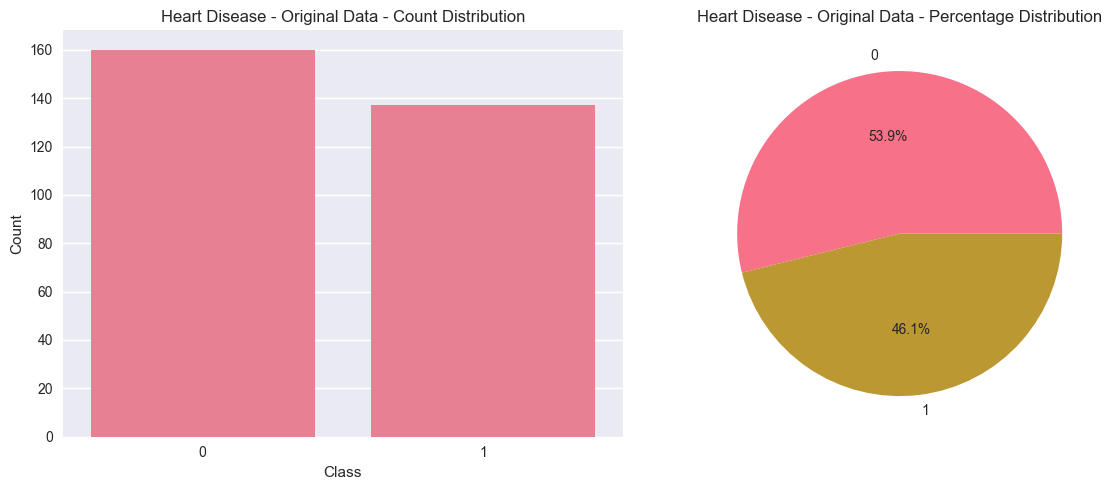


Heart Disease - Original Data Class Distribution:
target_binary
0    160
1    137
Name: count, dtype: int64
Class proportions:
target_binary
0    53.87
1    46.13
Name: count, dtype: float64%


In [3]:
# ==========================================
# 3. VISUALIZE CLASS DISTRIBUTION
# ==========================================

print("="*50)
print("3. VISUALIZE CLASS DISTRIBUTION")
print("="*50)

dataset_name = "Heart Disease"
target_col = "target_binary"

plot_class_distribution(data, target_col, f'{str(dataset_name)} - Original Data',
                      f'../../results/heart_disease/visualizations/original_distribution.png')

In [4]:
# ==========================================
# 4. SPLIT DATA INTO 4 DIFFERENT RATIOS
# ==========================================

print("\n" + "="*50)
print("4. SPLIT DATA INTO 4 DIFFERENT RATIOS")
print("="*50)

# Define split ratios
split_ratios = {
    '40/60': 0.4,
    '60/40': 0.6, 
    '80/20': 0.8,
    '90/10': 0.9
}

# Dictionary to store splits
data_splits = {}
target_splits = {}

# Perform stratified splits for each ratio
for ratio_name, train_size in split_ratios.items():
    print(f"\nSplitting data with ratio {ratio_name}...")
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        train_size=train_size,
        stratify=y,  # Ensure stratified split
        random_state=42,
        shuffle=True
    )
    
    # Store in dictionary
    data_splits[ratio_name] = (X_train, X_test)
    target_splits[ratio_name] = (y_train, y_test)
    
    # Print split information
    print(f"Train size: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
    print(f"Test size: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")
    print(f"Train class distribution:\n{y_train.value_counts()}")
    print(f"Test class distribution:\n{y_test.value_counts()}")


4. SPLIT DATA INTO 4 DIFFERENT RATIOS

Splitting data with ratio 40/60...
Train size: 118 (39.7%)
Test size: 179 (60.3%)
Train class distribution:
target_binary
0    64
1    54
Name: count, dtype: int64
Test class distribution:
target_binary
0    96
1    83
Name: count, dtype: int64

Splitting data with ratio 60/40...
Train size: 178 (59.9%)
Test size: 119 (40.1%)
Train class distribution:
target_binary
0    96
1    82
Name: count, dtype: int64
Test class distribution:
target_binary
0    64
1    55
Name: count, dtype: int64

Splitting data with ratio 80/20...
Train size: 237 (79.8%)
Test size: 60 (20.2%)
Train class distribution:
target_binary
0    128
1    109
Name: count, dtype: int64
Test class distribution:
target_binary
0    32
1    28
Name: count, dtype: int64

Splitting data with ratio 90/10...
Train size: 267 (89.9%)
Test size: 30 (10.1%)
Train class distribution:
target_binary
0    144
1    123
Name: count, dtype: int64
Test class distribution:
target_binary
0    16
1    14
N


5. VISUALIZE SPLIT DISTRIBUTIONS


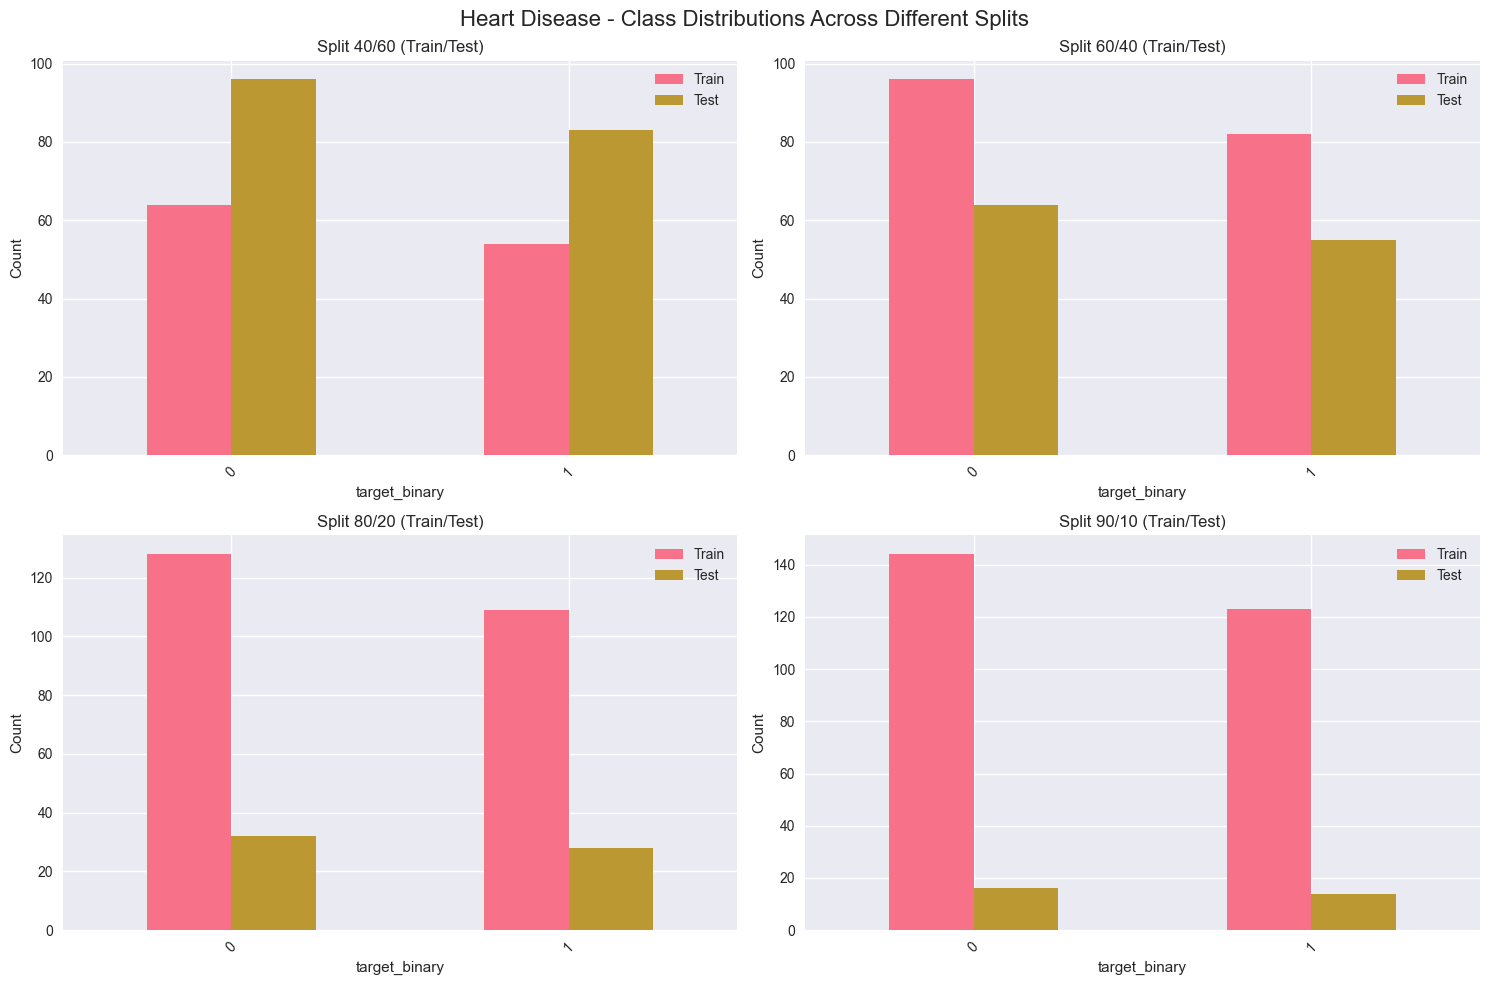

In [5]:
# ==========================================
# 5. VISUALIZE SPLIT DISTRIBUTIONS  
# ==========================================

print("\n" + "="*50)
print("5. VISUALIZE SPLIT DISTRIBUTIONS")
print("="*50)

# Prepare data for visualization
splits_for_viz = {}
for ratio_name in split_ratios.keys():
    y_train, y_test = target_splits[ratio_name]
    splits_for_viz[ratio_name] = (y_train, y_test)

# Plot distribution comparisons
plot_split_distributions(splits_for_viz, dataset_name, 
                        f'../../results/heart_disease/visualizations/split_distributions.png')

In [6]:
# ==========================================
# 6. SAVE RESULTS
# ==========================================

print("\n" + "="*50)
print("6. SAVE RESULTS")
print("="*50)

# Create output directory
import os
output_dir = '../../results/heart_disease'
os.makedirs(output_dir, exist_ok=True)

# Save splits for Milestone 2
import pickle

with open(f'{output_dir}/data_splits.pkl', 'wb') as f:
    pickle.dump({
        'data_splits': data_splits,
        'target_splits': target_splits,
        'original_data': (X, y),
        'dataset_info': {
            'name': dataset_name,
            'shape': data.shape,
            'features': list(X.columns),
            'target': target_col,
            'classes': sorted(y.unique().tolist())
        }
    }, f)

print(f"✅ Data splits saved to {output_dir}/data_splits.pkl")

# Create summary report
summary_stats = []
for ratio_name in split_ratios.keys():
    y_train, y_test = target_splits[ratio_name]
    summary_stats.append({
        'Split Ratio': ratio_name,
        'Train Size': len(y_train),
        'Test Size': len(y_test),
        'Train Class 0': (y_train == 0).sum(),
        'Train Class 1': (y_train == 1).sum(),
        'Test Class 0': (y_test == 0).sum(), 
        'Test Class 1': (y_test == 1).sum()
    })

summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv(f'{output_dir}/split_summary.csv', index=False)
print(f"✅ Summary saved to {output_dir}/split_summary.csv")

# Display summary
print("\nSplit Summary:")
print(summary_df)

print("\n" + "="*50)
print("COMPLETED ✅")
print("="*50)
print(f"Dataset: {dataset_name}")
print(f"Original samples: {len(data)}")
print(f"Features: {X.shape[1]}")
print(f"Classes: {len(y.unique())}")
print(f"Splits created: {len(split_ratios)}")
print(f"Output directory: {output_dir}")
print("="*50)


6. SAVE RESULTS
✅ Data splits saved to ../../results/heart_disease/data_splits.pkl
✅ Summary saved to ../../results/heart_disease/split_summary.csv

Split Summary:
  Split Ratio  Train Size  Test Size  Train Class 0  Train Class 1  \
0       40/60         118        179             64             54   
1       60/40         178        119             96             82   
2       80/20         237         60            128            109   
3       90/10         267         30            144            123   

   Test Class 0  Test Class 1  
0            96            83  
1            64            55  
2            32            28  
3            16            14  

COMPLETED ✅
Dataset: Heart Disease
Original samples: 297
Features: 13
Classes: 2
Splits created: 4
Output directory: ../../results/heart_disease


In [7]:
# ==========================================
# MILESTONE 2: DECISION TREE CLASSIFIERS
# ==========================================

print("\n" + "="*80)
print("BULD AND EVALUATE DECISION TREE CLASSIFIERS")
print("="*80)

# Import thêm các thư viện cần thiết cho Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Tạo thư mục lưu trữ kết quả về tree
viz_tree_dir = '../../results/heart_disease'
os.makedirs(viz_tree_dir, exist_ok=True)

# Tạo hàm trực quan hóa cây quyết định
def visualize_tree_sklearn(model, feature_names, class_names, file_name, max_depth=None, sub_file_name=None):
    plt.figure(figsize=(20, 10))
    plot_tree(model, 
              feature_names=feature_names,  
              class_names=class_names,
              filled=True, 
              rounded=True,
              max_depth=max_depth,
              fontsize=10,
              precision=4)
    
     # Xử lý tên file - thay thế ký tự / bằng _
    safe_file_name = file_name.replace('/', '_')

    plt.title(f'Decision Tree - {file_name}')
    plt.tight_layout()
    
    # Tạo thư mục nếu chưa tồn tại
    os.makedirs(viz_tree_dir, exist_ok=True)
    
    # Lưu hình ảnh
    file_path = f"{viz_tree_dir}/{sub_file_name}/{safe_file_name}.png"
    plt.savefig(file_path, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"✅ Decision Tree has been saved at: {file_path}")
    return file_path

# ==========================================
# 2.2. BUILD DECISION TREE CLASSIFIERS
# ==========================================

print("\n" + "="*50)
print("2.2. BUILD DECISION TREE CLASSIFIERS")
print("="*50)

# Dictionary để lưu các mô hình
models = {}

# Xây dựng và trực quan hóa các Decision Tree cho mỗi tỉ lệ train/test
for split_name in data_splits:
    print(f"\nModeling for {split_name} ratio:")
    X_train, X_test = data_splits[split_name]
    y_train, y_test = target_splits[split_name]
    
    # Khởi tạo và huấn luyện mô hình Decision Tree
    # Sử dụng criterion='entropy' để sử dụng information gain
    model = DecisionTreeClassifier(criterion='entropy', random_state=42)
    model.fit(X_train, y_train)
    models[split_name] = model
    
    # Thông tin về mô hình
    print(f"Number of nodes: {model.tree_.node_count}")
    print(f"Depth of tree: {model.get_depth()}")
    
    # Trực quan hóa decision tree
    visualize_tree_sklearn(model, 
                          feature_names=X_train.columns, 
                          class_names=['No Disease', 'Disease'], 
                          file_name=f"{split_name}_tree", sub_file_name='build_tree')

# Lưu các mô hình
with open(f'{output_dir}/tree_models.pkl', 'wb') as f:
    pickle.dump(models, f)
    
print(f"\n✅ All Models have been save at: {output_dir}/tree_models.pkl")

# Hiển thị hình ảnh cây quyết định cho tỉ lệ 80/20
try:
    from IPython.display import Image
    Image(filename=f"{viz_tree_dir}/build_tree/80/20_tree.png")
except:
    print("Cannot dislay image directly. View at file:", f"{viz_tree_dir}/build_tree/80/20_tree.png")


BULD AND EVALUATE DECISION TREE CLASSIFIERS

2.2. BUILD DECISION TREE CLASSIFIERS

Modeling for 40/60 ratio:
Number of nodes: 39
Depth of tree: 11
✅ Decision Tree has been saved at: ../../results/heart_disease/build_tree/40_60_tree.png

Modeling for 60/40 ratio:
Number of nodes: 59
Depth of tree: 10
✅ Decision Tree has been saved at: ../../results/heart_disease/build_tree/60_40_tree.png

Modeling for 80/20 ratio:
Number of nodes: 79
Depth of tree: 11
✅ Decision Tree has been saved at: ../../results/heart_disease/build_tree/80_20_tree.png

Modeling for 90/10 ratio:
Number of nodes: 87
Depth of tree: 9
✅ Decision Tree has been saved at: ../../results/heart_disease/build_tree/90_10_tree.png

✅ All Models have been save at: ../../results/heart_disease/tree_models.pkl
Cannot dislay image directly. View at file: ../../results/heart_disease/build_tree/80/20_tree.png



2.3. EVALUATE DECISION TREE CLASSIFIERS

------------------------------
Model evaluation for 40/60 ratio:
------------------------------
Accuracy: 0.7765

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.77      0.82      0.80        96
     Disease       0.78      0.72      0.75        83

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179


Confusion Matrix:
[[79 17]
 [23 60]]


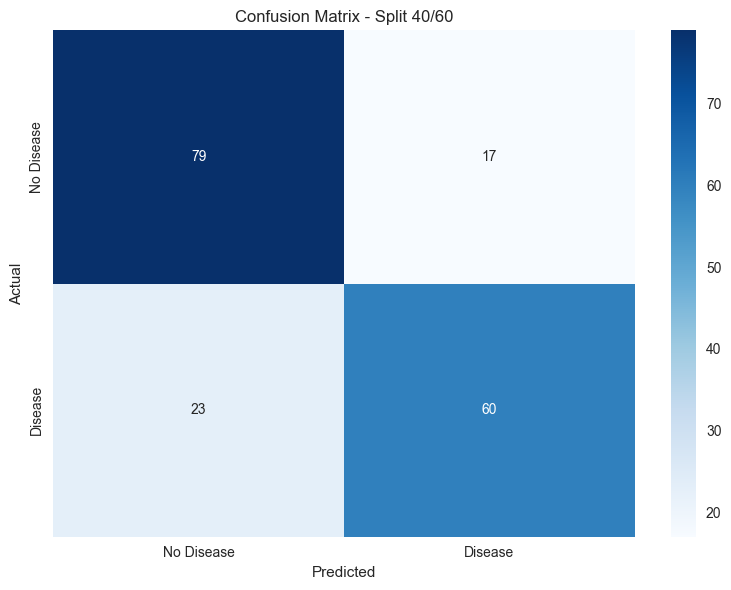

✅ Confusion Matrix has been saved at: ../../results/heart_disease/assess_tree/40_60_confusion_matrix.png

------------------------------
Model evaluation for 60/40 ratio:
------------------------------
Accuracy: 0.7479

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.72      0.86      0.79        64
     Disease       0.79      0.62      0.69        55

    accuracy                           0.75       119
   macro avg       0.76      0.74      0.74       119
weighted avg       0.75      0.75      0.74       119


Confusion Matrix:
[[55  9]
 [21 34]]


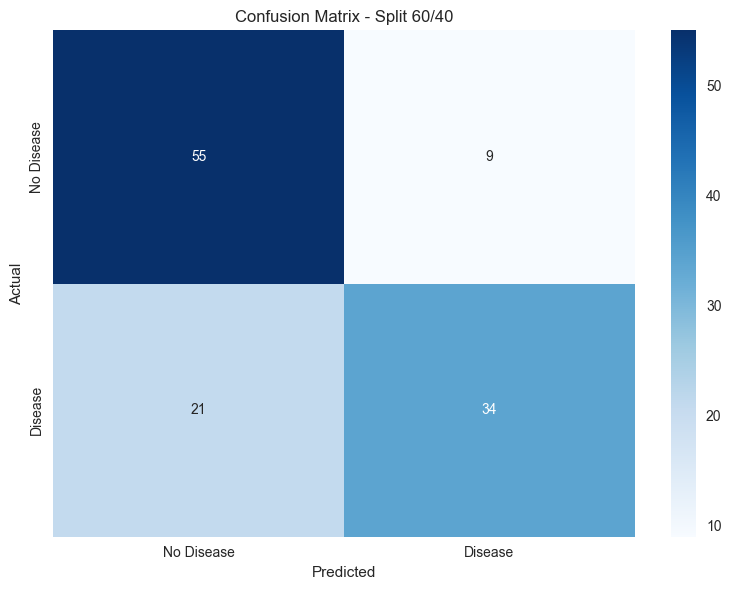

✅ Confusion Matrix has been saved at: ../../results/heart_disease/assess_tree/60_40_confusion_matrix.png

------------------------------
Model evaluation for 80/20 ratio:
------------------------------
Accuracy: 0.7667

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.80      0.75      0.77        32
     Disease       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60


Confusion Matrix:
[[24  8]
 [ 6 22]]


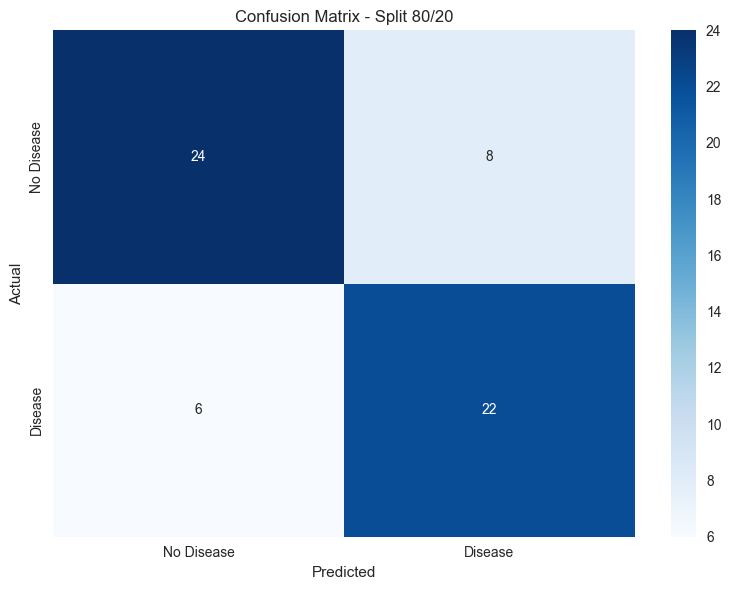

✅ Confusion Matrix has been saved at: ../../results/heart_disease/assess_tree/80_20_confusion_matrix.png

------------------------------
Model evaluation for 90/10 ratio:
------------------------------
Accuracy: 0.7000

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.68      0.81      0.74        16
     Disease       0.73      0.57      0.64        14

    accuracy                           0.70        30
   macro avg       0.71      0.69      0.69        30
weighted avg       0.70      0.70      0.69        30


Confusion Matrix:
[[13  3]
 [ 6  8]]


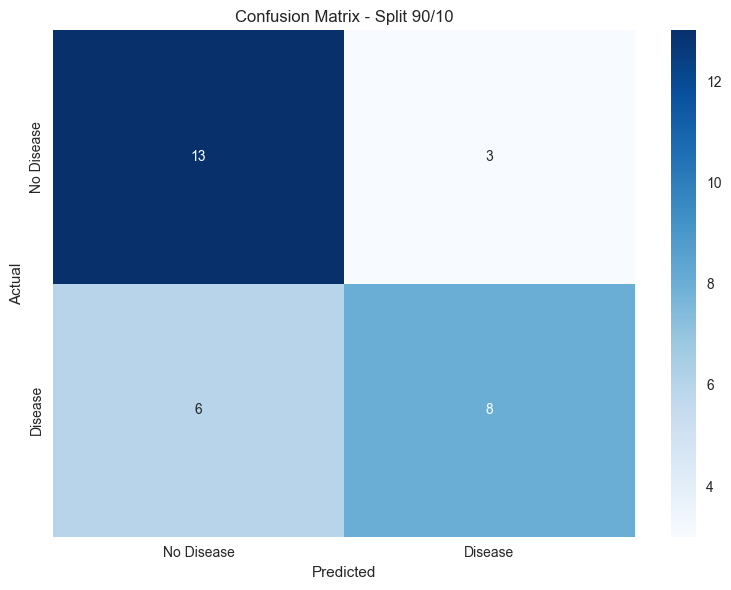

✅ Confusion Matrix has been saved at: ../../results/heart_disease/assess_tree/90_10_confusion_matrix.png

✅ All evaluation results have been saved at: ../../results/heart_disease/evaluation_results.pkl

ANALYZE AND INTERPRETE THE RESULTS

Classification Report Analysis:
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. It represents how many of the samples identified as positive are actually positive.
- Recall: The ratio of correctly predicted positive observations to all actual positives in the dataset. It indicates how many of the actual positive samples were correctly identified.
- F1-score: The harmonic mean of Precision and Recall, providing a balance between the two metrics.
- Support: The number of actual occurrences of each class in the dataset.

Confusion Matrix Analysis:
- True Negative (TN): Number of patients without heart disease who were correctly classified as not having the disease.
- False Positive (FP): Number of pat

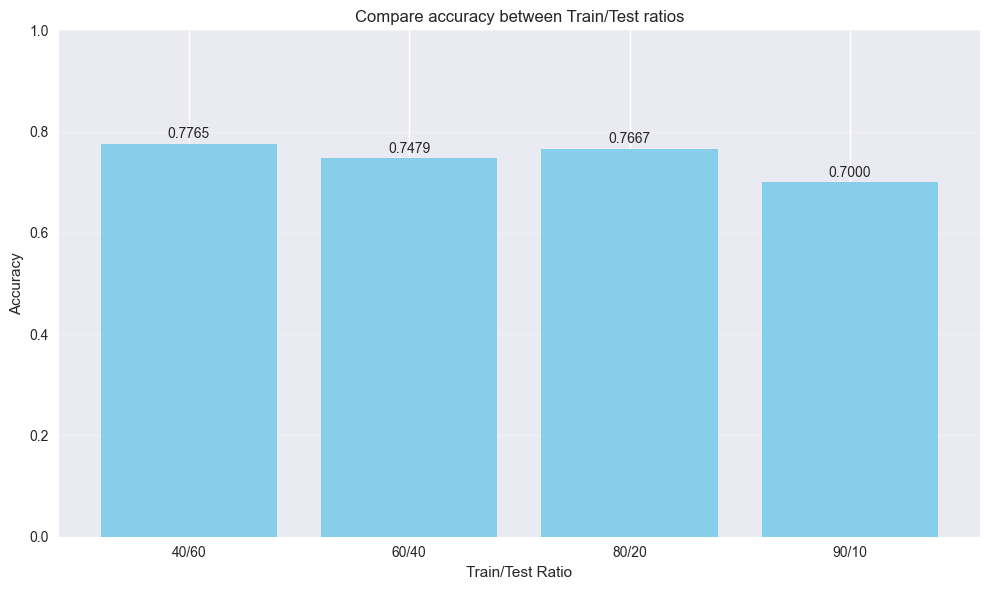

✅ Visualization of accuracy comparison has been saved at: ../../results/heart_disease/analysis/accuracy_comparison.png


In [8]:
# ==========================================
# 2.3. ĐÁNH GIÁ DECISION TREE CLASSIFIERS
# ==========================================

print("\n" + "="*50)
print("2.3. EVALUATE DECISION TREE CLASSIFIERS")
print("="*50)

# Dictionary để lưu kết quả đánh giá
evaluation_results = {}

# Đánh giá từng mô hình
for split_name in models:
    print(f"\n{'-'*30}")
    print(f"Model evaluation for {split_name} ratio:")
    print(f"{'-'*30}")
    
    model = models[split_name]
    X_train, X_test = data_splits[split_name]
    y_train, y_test = target_splits[split_name]
    
    # Dự đoán trên tập test
    y_pred = model.predict(X_test)
    
    # Tính toán các metrics
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'])
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Lưu kết quả
    evaluation_results[split_name] = {
        'accuracy': accuracy,
        'classification_report': class_report,
        'confusion_matrix': conf_matrix
    }
    
    # In kết quả đánh giá
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(class_report)
    print("\nConfusion Matrix:")
    print(conf_matrix)
    
    # Vẽ và lưu confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
               xticklabels=['No Disease', 'Disease'],
               yticklabels=['No Disease', 'Disease'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"Confusion Matrix - Split {split_name}")
    plt.tight_layout()

    # Xử lý tên file - thay thế ký tự / bằng _
    safe_file_name = f"{split_name.replace('/', '_')}_confusion_matrix.png"

    plt.savefig(f"{viz_tree_dir}/assess_tree/{safe_file_name}", dpi=300, bbox_inches='tight')
    plt.show()
    print(f"✅ Confusion Matrix has been saved at: {viz_tree_dir}/assess_tree/{safe_file_name}")

# Lưu kết quả đánh giá
with open(f'{output_dir}/evaluation_results.pkl', 'wb') as f:
    pickle.dump(evaluation_results, f)

print(f"\n✅ All evaluation results have been saved at: {output_dir}/evaluation_results.pkl")

# Phân tích và diễn giải các kết quả
print("\n" + "="*50)
print("ANALYZE AND INTERPRETE THE RESULTS")
print("="*50)

print("""
Classification Report Analysis:
- Precision: The ratio of correctly predicted positive observations to the total predicted positives. It represents how many of the samples identified as positive are actually positive.
- Recall: The ratio of correctly predicted positive observations to all actual positives in the dataset. It indicates how many of the actual positive samples were correctly identified.
- F1-score: The harmonic mean of Precision and Recall, providing a balance between the two metrics.
- Support: The number of actual occurrences of each class in the dataset.

Confusion Matrix Analysis:
- True Negative (TN): Number of patients without heart disease who were correctly classified as not having the disease.
- False Positive (FP): Number of patients without heart disease who were incorrectly classified as having the disease.
- False Negative (FN): Number of patients with heart disease who were incorrectly classified as not having the disease.
- True Positive (TP): Number of patients with heart disease who were correctly classified as having the disease.


Conclusion:
In the context of heart disease diagnosis, False Negatives (missing patients with disease) are more dangerous than False Positives (incorrectly diagnosing healthy individuals), therefore the Recall metric for the "Disease" class is particularly critical.
""")

# Tạo bảng so sánh accuracy giữa các tỉ lệ
accuracies = {split_name: results['accuracy'] for split_name, results in evaluation_results.items()}
accuracy_df = pd.DataFrame(list(accuracies.items()), columns=['Split Ratio', 'Accuracy'])
accuracy_df = accuracy_df.sort_values('Split Ratio')

print("\nAccuracy comparison between train/test ratios:")
print(accuracy_df)

# Vẽ biểu đồ so sánh accuracy
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Split Ratio'], accuracy_df['Accuracy'], color='skyblue')
plt.xlabel('Train/Test Ratio')
plt.ylabel('Accuracy')
plt.title('Compare accuracy between Train/Test ratios')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate(accuracy_df['Accuracy']):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.tight_layout()
plt.savefig(f"{viz_tree_dir}/analysis/comparison/accuracy_comparison.png", dpi=300, bbox_inches='tight')
plt.show()
print(f"✅ Visualization of accuracy comparison has been saved at: {viz_tree_dir}/analysis/accuracy_comparison.png")



2.4. ANALYSIS OF THE IMPACT OF PLANT DEPTH

Experiment with different max_depth values ​​(80/20 ratio):
Max Depth: None, Accuracy: 0.7667, Number of nodes: 79
✅ Decision Tree has been saved at: ../../results/heart_disease/analysis/depth_analysis/depth_None.png
Max Depth: 2, Accuracy: 0.7167, Number of nodes: 7
✅ Decision Tree has been saved at: ../../results/heart_disease/analysis/depth_analysis/depth_2.png
Max Depth: 3, Accuracy: 0.8167, Number of nodes: 15
✅ Decision Tree has been saved at: ../../results/heart_disease/analysis/depth_analysis/depth_3.png
Max Depth: 4, Accuracy: 0.7667, Number of nodes: 27
✅ Decision Tree has been saved at: ../../results/heart_disease/analysis/depth_analysis/depth_4.png
Max Depth: 5, Accuracy: 0.7667, Number of nodes: 41
✅ Decision Tree has been saved at: ../../results/heart_disease/analysis/depth_analysis/depth_5.png
Max Depth: 6, Accuracy: 0.7333, Number of nodes: 55
✅ Decision Tree has been saved at: ../../results/heart_disease/analysis/depth_analy

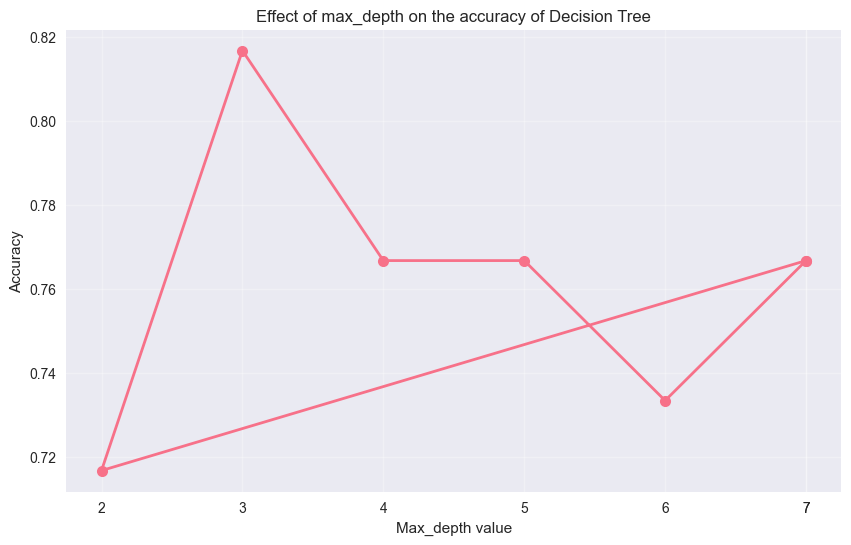

✅ Visualizations of the effect of max_depth has been saved at: ../../results/heart_disease/analysis/depth_accuracy/depth_vs_accuracy.png
| max_depth  |    None    |     2      |     3      |     4      |     5      |     6      |     7      |
| ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- | ---------- |
|  Accuracy  |   0.7667   |   0.7167   |   0.8167   |   0.7667   |   0.7667   |   0.7333   |   0.7667   |

✅ The depth analysis results have been saved at: ../../results/heart_disease/depth_analysis.pkl

INSIGHTS

From our analysis of building and evaluating Decision Tree models for the Heart Disease dataset, we draw the following conclusions:

1. Performance Across Different Train/Test Ratios:
   - The train/test ratio significantly impacts model performance
   - Ratios with more training data generally yield better results
   - However, with limited samples, there needs to be careful consideration between training data volume and testing dat

In [9]:
# ==========================================
# 2.4. PHÂN TÍCH ẢNH HƯỞNG CỦA ĐỘ SÂU CÂY
# ==========================================

print("\n" + "="*50)
print("2.4. ANALYSIS OF THE IMPACT OF PLANT DEPTH")
print("="*50)

# Sử dụng tỉ lệ 80/20 theo yêu cầu
X_train, X_test = data_splits['80/20']
y_train, y_test = target_splits['80/20']

# Danh sách các giá trị max_depth cần thử nghiệm
max_depths = [None, 2, 3, 4, 5, 6, 7]
depth_results = {}

print("\nExperiment with different max_depth values ​​(80/20 ratio):")
for depth in max_depths:
    # Xây dựng mô hình với độ sâu được chỉ định
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    # Dự đoán và tính accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    depth_results[depth] = accuracy
    
    depth_str = str(depth) if depth is not None else 'None'
    print(f"Max Depth: {depth_str}, Accuracy: {accuracy:.4f}, Number of nodes: {model.tree_.node_count}")
    
    # Trực quan hóa cây quyết định
    visualize_tree_sklearn(model, 
                          feature_names=X_train.columns, 
                          class_names=['No Disease', 'Disease'], 
                          file_name=f"depth_{depth_str}",
                          max_depth=depth, sub_file_name='analysis/depth_analysis')

# Vẽ biểu đồ độ chính xác theo độ sâu
plt.figure(figsize=(10, 6))
depths_for_plot = [7 if d is None else d for d in max_depths]  # None sẽ được biểu diễn như độ sâu tối đa
labels = [str(d) if d is not None else 'None' for d in max_depths]

plt.plot(depths_for_plot, list(depth_results.values()), marker='o', linestyle='-', linewidth=2, markersize=8)
plt.xticks(depths_for_plot, labels)
plt.xlabel('Max_depth value')
plt.ylabel('Accuracy')
plt.title('Effect of max_depth on the accuracy of Decision Tree')
plt.grid(True, alpha=0.3)
plt.savefig(f"{viz_tree_dir}/analysis/depth_accuracy/depth_vs_accuracy.png", dpi=300, bbox_inches="tight")
plt.show()
print(f"✅ Visualizations of the effect of max_depth has been saved at: {viz_tree_dir}/analysis/depth_accuracy/depth_vs_accuracy.png")

# Tạo bảng kết quả
col_width = 10

# Tạo header của bảng
header = "| " + "max_depth".center(col_width) + " |"
for d in max_depths:
    val = "None" if d is None else str(d)
    header += " " + val.center(col_width) + " |"
print(header)

# Tạo dòng phân cách
separator = "| " + "-" * col_width + " |"
for _ in max_depths:
    separator += " " + "-" * col_width + " |"
print(separator)

# Tạo dòng accuracy
accuracy_row = "| " + "Accuracy".center(col_width) + " |"
for d in max_depths:
    val = f"{depth_results[d]:.4f}"
    accuracy_row += " " + val.center(col_width) + " |"
print(accuracy_row)

# Lưu kết quả phân tích độ sâu
with open(f'{output_dir}/depth_analysis.pkl', 'wb') as f:
    pickle.dump({
        'max_depths': max_depths,
        'accuracies': depth_results
    }, f)

print(f"\n✅ The depth analysis results have been saved at: {output_dir}/depth_analysis.pkl")

# ==========================================
# INSIGHTS VÀ MỘT SỐ KẾT LUẬN
# ==========================================

print("\n" + "="*50)
print("INSIGHTS")
print("="*50)

print("""
From our analysis of building and evaluating Decision Tree models for the Heart Disease dataset, we draw the following conclusions:

1. Performance Across Different Train/Test Ratios:
   - The train/test ratio significantly impacts model performance
   - Ratios with more training data generally yield better results
   - However, with limited samples, there needs to be careful consideration between training data volume and testing data adequacy

2. Impact of Tree Depth:
   - Low max_depth (2-3): Models are simple and interpretable but may lack capacity to learn complex patterns
   - Medium max_depth (4-6): Models can capture more complex relationships in the data
   - High max_depth or unlimited: Risk of overfitting increases as the model "memorizes" the training data
   - Finding the optimal max_depth value is crucial to balance between model complexity and generalization ability

3. Heart Disease Prediction Considerations:
   - Decision Trees are valuable tools for medical diagnosis due to their interpretability
   - Special attention must be paid to the Recall metric for the "Disease" class to minimize missed disease cases
   - Identifying optimal classification thresholds (as shown in Figure 1 of the assignment) helps improve diagnostic accuracy
      
4. Additional Insights:
   - Feature importance analysis reveals which medical indicators are most critical for diagnosis
   - The visualized decision trees provide medical professionals with interpretable decision paths
   - While accuracy is important, in medical contexts like heart disease diagnosis, the consequences of different types of errors (false positives vs. false negatives) must be carefully weighted
   - For real-world applications, more sophisticated tree-based methods like Random Forests or Gradient Boosting might provide better performance while maintaining some level of interpretability
      
5. Future Work:
   - Experiment with different hyperparameter combinations beyond just tree depth
   - Consider feature engineering to improve model performance
   - Explore class weighting to address the importance of correctly identifying disease cases
   - Investigate pruning techniques to further optimize tree structure and prevent overfitting
""")